In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yfin
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [3]:
yfin.pdr_override()
start = '2010-01-01'
end = '2023-02-06'

df = pdr.get_data_yahoo("AAPL",start,end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30,144.960007,145.550003,142.850006,143.000000,142.781998,64015300
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.070023,65874500
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.208282,77663600
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.590088,118339000
2023-02-03,148.029999,157.380005,147.830002,154.500000,154.264465,154357300


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443576,447610800


In [5]:
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


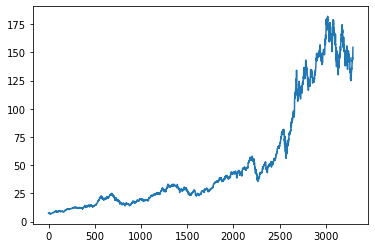

In [6]:
plt.plot(df.Close)

In [7]:
MA100 = df.Close.rolling(100).mean()
MA200 = df.Close.rolling(200).mean()
#MA100
#MA200

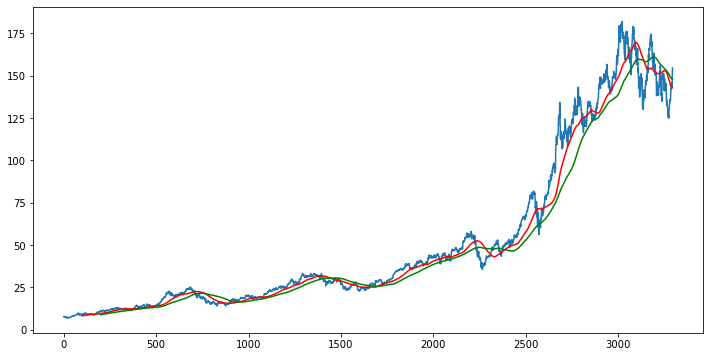

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(MA100, 'r')
plt.plot(MA200, 'g')

In [9]:
#Spliting The data into training and testing
train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(2306, 1)
(989, 1)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
train_array = scaler.fit_transform(train)
train_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71207165],
       [0.7209656 ],
       [0.72526598]])

In [12]:
x_train = []
y_train = []
for i in range(100, train_array.shape[0]):
    x_train.append(train_array[i-100: i])
    y_train.append(train_array[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

# Machine learning model

In [5]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 15s 143ms/step - loss: 0.0322
Epoch 2/50
69/69 [==============================] - 9s 133ms/step - loss: 0.0067
Epoch 3/50
69/69 [==============================] - 9s 135ms/step - loss: 0.0060
Epoch 4/50
69/69 [==============================] - 9s 133ms/step - loss: 0.0059
Epoch 5/50
69/69 [==============================] - 9s 136ms/step - loss: 0.0054
Epoch 6/50
69/69 [==============================] - 9s 134ms/step - loss: 0.0052
Epoch 7/50
69/69 [==============================] - 9s 134ms/step - loss: 0.0047
Epoch 8/50
69/69 [==============================] - 9s 135ms/step - loss: 0.0046
Epoch 9/50
69/69 [==============================] - 9s 132ms/step - loss: 0.0043
Epoch 10/50
69/69 [==============================] - 9s 134ms/step - loss: 0.0045
Epoch 11/50
69/69 [==============================] - 9s 132ms/step - loss: 0.0039
Epoch 12/50
69/69 [==============================] - 9s 136ms/step - loss: 0.0040
Epoch 13/50
69/69 [=====

In [17]:
model.save('keras_model.h5')

In [23]:
train.tail(100)

,Close
2206,55.942501
2207,56.717499
2208,54.090000
2209,53.612499
2210,55.527500
...,...
2301,43.582500
2302,43.717499
2303,43.287498
2304,43.742500


In [31]:
past_100_days = train.tail(100)
test

,Close
2306,43.882500
2307,43.630001
2308,43.125000
2309,43.227501
2310,44.724998
...,...
3290,143.000000
3291,144.289993
3292,145.429993
3293,150.820007


In [29]:
final_df = past_100_days.append(test, ignore_index=True)

C:\Users\ANIKET VISHWAKARMA\AppData\Local\Temp\ipykernel_8364\1805671855.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test, ignore_index=True)


In [30]:
final_df

,Close
0,55.942501
1,56.717499
2,54.090000
3,53.612499
4,55.527500
...,...
1084,143.000000
1085,144.289993
1086,145.429993
1087,150.820007


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13925067],
       [0.14454211],
       [0.12660237],
       ...,
       [0.75024321],
       [0.78704454],
       [0.81217038]])

In [33]:
input_data.shape

(1089, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(989, 100, 1)
(989,)


In [36]:
#Makng Prediction

In [37]:
y_pred = model.predict(x_test)

31/31 [==============================] - 2s 41ms/step


In [38]:
y_pred.shape

(989, 1)

In [39]:
scaler.scale_

array([0.00682769])

In [40]:
scale_factor = 1/0.00682769
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

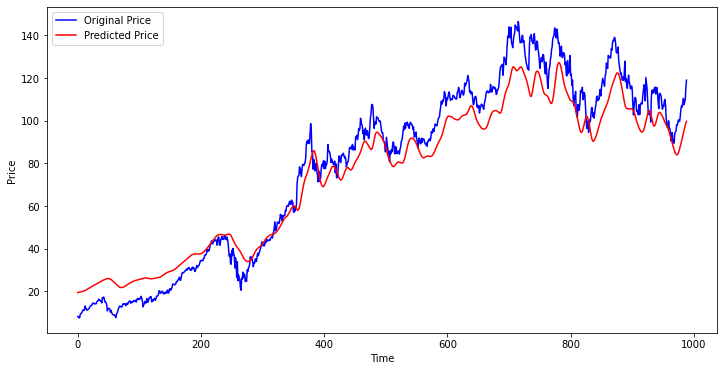

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1]:
from tensorflow import keras
import tensorflow

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [8]:
modelnew = keras.models.load_model('C:/Users/ANIKET VISHWAKARMA/My project/Untitled Folder/keras_model.h5')
converter = tensorflow.lite.TFLiteConverter.from_keras_model(modelnew)
converter.target_spec.supported_ops = [
    tensorflow.lite.OpsSet.TFLITE_BUILTINS,
    tensorflow.lite.OpsSet.SELECT_TF_OPS
]
tflite_model = converter.convert()
with open("converted_model.tflite","wb") as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ANIKET~1\AppData\Local\Temp\tmpj2axp11x\assets


INFO:tensorflow:Assets written to: C:\Users\ANIKET~1\AppData\Local\Temp\tmpj2axp11x\assets
